In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
TRAIN_FILES = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
TEST_FILE = ['test_batch']

In [4]:
batch1 = unpickle('data/' + TRAIN_FILES[0]) 
batch2 = unpickle('data/' + TRAIN_FILES[1])
batch3 = unpickle('data/' + TRAIN_FILES[2])
batch4 = unpickle('data/' + TRAIN_FILES[3])
batch5 = unpickle('data/' + TRAIN_FILES[4])

## Metadata

In [5]:
meta_data = unpickle('data/batches.meta')
meta_data[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

## Getting ready the data

In [6]:
labels_train = np.array([])
b1_label = np.asarray(batch1[b'labels']).reshape(-1, 1)
b2_label = np.asarray(batch2[b'labels']).reshape(-1, 1)
b3_label = np.asarray(batch3[b'labels']).reshape(-1, 1)
b4_label = np.asarray(batch4[b'labels']).reshape(-1, 1)
b5_label = np.asarray(batch5[b'labels']).reshape(-1, 1)

labels_train = np.concatenate((b1_label, b2_label, b3_label,
                              b4_label, b5_label), axis=0)

In [7]:
img_train = np.array([])
b1_img = batch1[b'data']
b2_img = batch2[b'data']
b3_img = batch3[b'data']
b4_img = batch4[b'data']
b5_img = batch5[b'data']

img_train = np.concatenate((b1_img, b2_img, b3_img,
                           b4_img, b5_img), axis=0)

In [58]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [9]:
def vector2image(x, shape=32):
    # Check dimensions of the input array
    assert x.shape[1]==(shape**2)*3, 'Dimensions of the input array mismatched'
    
    x_reshaped = np.zeros([x.shape[0], shape, shape, 3], dtype=np.uint8)

    for r in range(x.shape[0]):
        img = x[r, :].reshape(-1, 1)
        img_chunked = np.array_split(img, 3)

        for i in range(3):
            img_channel = img_chunked[i].reshape(shape, shape)
            x_reshaped[r, :, :, i] = img_channel

    return x_reshaped

In [10]:
X = vector2image(img_train)

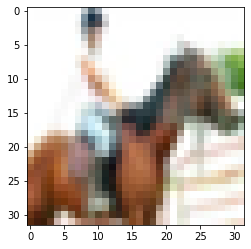

Label: b'horse'


In [37]:
idx = 131
img = X[idx, :,:,:]
img.shape
show_img(X[idx,:,:,:])
print('Label: {}'.format(meta_data[b'label_names'][labels_train[idx][0]]))

## Cropped data: 28x28 images

In [63]:
def crop_data(img_ds, size=28):
    img_crop_gray = np.zeros([img_ds.shape[0], size, size, 1], dtype=np.uint8)

    for r in range(img_ds.shape[0]):
        aux_crop =  tf.image.random_crop(img_ds[r, :, :, :], [size, size, 3], seed=None, name=None)
        aux_gray = tf.image.rgb_to_grayscale(aux_crop)
        img_crop_gray[r, :, :, :] = aux_gray
        
    img_crop_gray = img_crop_gray / np.max(img_crop_gray)
    
    return img_crop_gray

In [64]:
X_crop = crop_data(X)

In [65]:
X_crop.shape

(50000, 28, 28, 1)

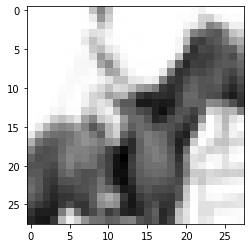

In [66]:
show_img(X_crop[131,:,:,:])

#### Convert patches to grayscale